In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import warnings
warnings.filterwarnings('ignore')

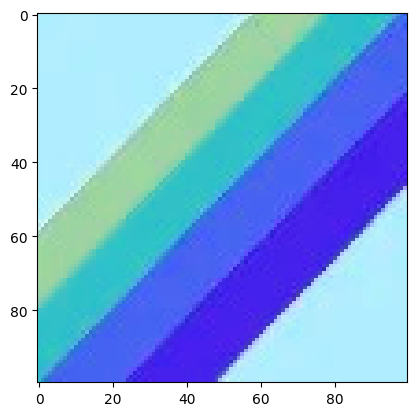

In [7]:
image = cv2.imread('colors.jpg')

plt.imshow(image);

In [8]:
image.shape

(100, 100, 3)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = 0,with_std=1)

In [10]:
r = []
g = []
b = []

for line in image:
    for pixel in line:
        temp_b , temp_g,temp_r = pixel
        
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
    
df = pd.DataFrame({'red': r,'green': g,'blue': b})

df['scaled_red'] = scaler.fit_transform(df[['red']])
df['scaled_green'] = scaler.fit_transform(df[['green']])
df['scaled_blue'] = scaler.fit_transform(df[['blue']])

df.head()

,red,green,blue,scaled_red,scaled_green,scaled_blue
0,254,239,174,8.106997,3.177254,3.211491
1,254,239,174,8.106997,3.177254,3.211491
2,254,239,174,8.106997,3.177254,3.211491
3,254,239,174,8.106997,3.177254,3.211491
4,255,238,174,8.138914,3.163960,3.211491


In [11]:
X = df[['scaled_red','scaled_green','scaled_blue']].values
X

array([[8.10699684, 3.1772542 , 3.21149114],
       [8.10699684, 3.1772542 , 3.21149114],
       [8.10699684, 3.1772542 , 3.21149114],
       ...,
       [8.13891415, 3.1506663 , 3.22994799],
       [8.13891415, 3.1506663 , 3.22994799],
       [8.13891415, 3.1506663 , 3.22994799]])

In [12]:
SSE = []

for cluster in range(2,8): 
    kmeans = KMeans(n_clusters=cluster,random_state=42)
    kmeans.fit(X)
    
    pred_clusters = kmeans.predict(X)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(2,8) , 'SSE':SSE})
print(frame)

   Cluster           SSE
0        2  14496.083552
1        3   5522.411369
2        4   1789.865372
3        5   1055.388809
4        6    849.733768
5        7    726.070382


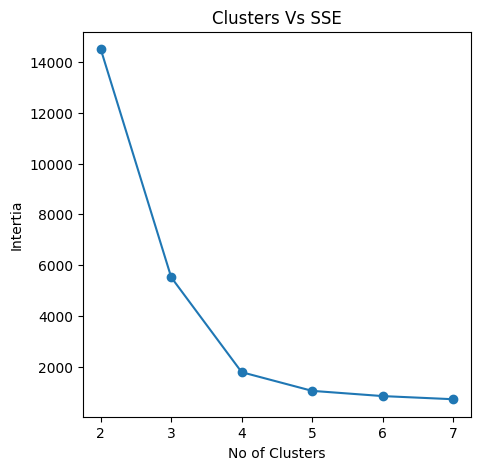

In [13]:
plt.figure(figsize=(5,5))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.title('Clusters Vs SSE')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')
plt.show()

In [14]:
#Fit and predict for k = 4
k=4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
k_pred = kmeans.predict(X)

#These are the centroids of the clusters
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[7.58254703, 0.931853  , 1.27757233],
       [8.08247263, 3.14582981, 3.26172787],
       [6.4162956 , 2.46814405, 0.96362844],
       [5.28936533, 2.79823677, 2.80131169]])

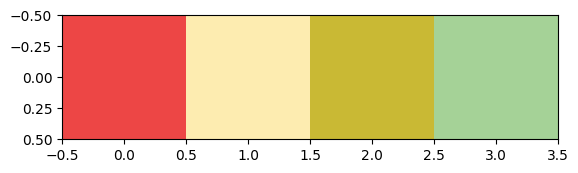

In [15]:
colors = []

r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    
    colors.append((
    scaled_r * r_std /255,
    scaled_g * g_std / 255,
    scaled_b * b_std/ 255
    ))
    
plt.imshow([colors])
plt.show()